In [23]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [3]:
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

In [4]:
print(f"The training sample:\n{train_data[0]}")
print(f"The training label:\n{train_labels[0]}")

The training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

In [5]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

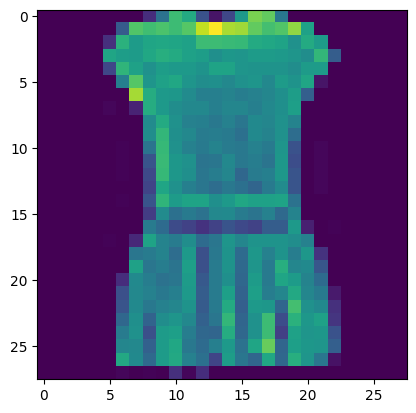

In [6]:
plt.imshow(train_data[3])

In [7]:
label_names=['Tshirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Snekar','Bag','Ankle Boot']
len(label_names)

10

Text(0.5, 1.0, 'Snekar')

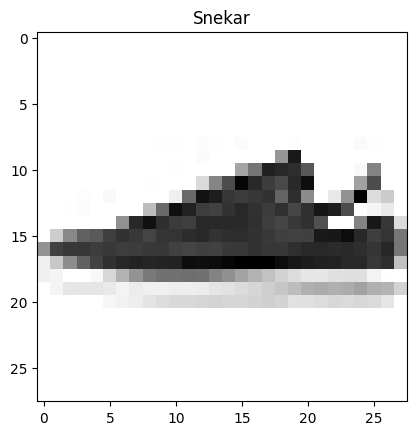

In [8]:
index=random.randint(0,11)
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(label_names[train_labels[index]])

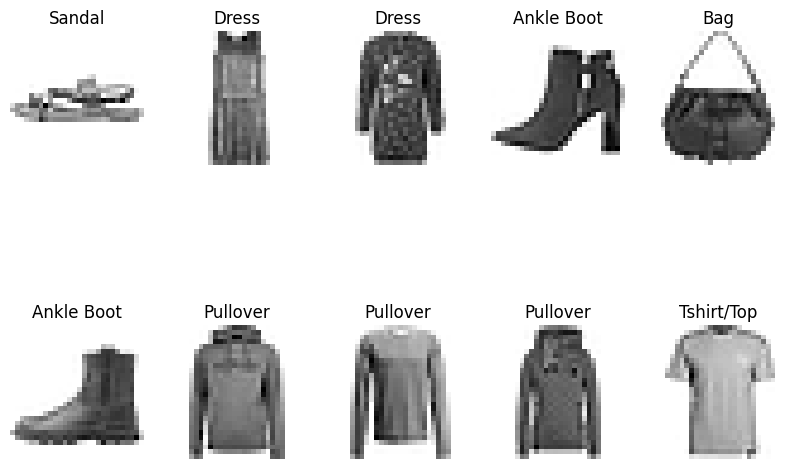

In [9]:
plt.figure(figsize=(10,7))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    index=random.choice(range(len(train_data)))
    plt.imshow(train_data[index], cmap=plt.cm.binary)
    plt.title(label_names[train_labels[index]])
    plt.axis(False)

In [25]:
tf.random.set_seed(100)
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_1.add(tf.keras.layers.Dense(1000, activation='relu'))
model_1.add(tf.keras.layers.Dense(100, activation='relu'))
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))
model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])
history_1=model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 4.0887 - accuracy: 0.3504 - val_loss: 1.6463 - val_accuracy: 0.3435
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 1.3817 - accuracy: 0.4436 - val_loss: 1.4044 - val_accuracy: 0.3835
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 1.9060 - accuracy: 0.2711 - val_loss: 2.0595 - val_accuracy: 0.1851
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 2.0724 - accuracy: 0.1835 - val_loss: 2.0616 - val_accuracy: 0.1849
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 2.0738 - accuracy: 0.1828 - val_loss: 2.3037 - val_accuracy: 0.1926
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 2.0943 - accuracy: 0.1819 - val_loss: 2.1182 - val_accuracy: 0.1900
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 2.0537 - accuracy: 0.1878 - val_loss: 2.5437 -

In [10]:
scaler=MinMaxScaler()
train_samples,train_nx,train_ny=train_data.shape
test_samples,test_nx,test_ny=test_data.shape
train_data_norm=scaler.fit_transform(train_data.reshape(train_samples,train_nx*train_ny))
test_data_norm=scaler.transform(test_data.reshape(test_samples,test_nx*test_ny))
train_data_norm.min(),train_data_norm.max(),test_data_norm.min(),test_data_norm.max()

(0.0, 1.0, 0.0, 1.8319327731092436)

In [53]:
model_2=tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1000, activation='relu'))
model_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))
model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                metrics=['accuracy'])
history_2=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5462 - accuracy: 0.8102 - val_loss: 0.5703 - val_accuracy: 0.8141
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.4177 - accuracy: 0.8526 - val_loss: 0.4231 - val_accuracy: 0.8458
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4003 - accuracy: 0.8600 - val_loss: 0.4177 - val_accuracy: 0.8547
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3673 - accuracy: 0.8697 - val_loss: 0.4420 - val_accuracy: 0.8468
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3635 - accuracy: 0.8724 - val_loss: 0.3976 - val_accuracy: 0.8635
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3501 - accuracy: 0.8758 - val_loss: 0.4043 - val_accuracy: 0.8627
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3399 - accuracy: 0.8795 - val_loss: 0.4038 -

<AxesSubplot:title={'center':'Normalized Data Loss Curves'}>

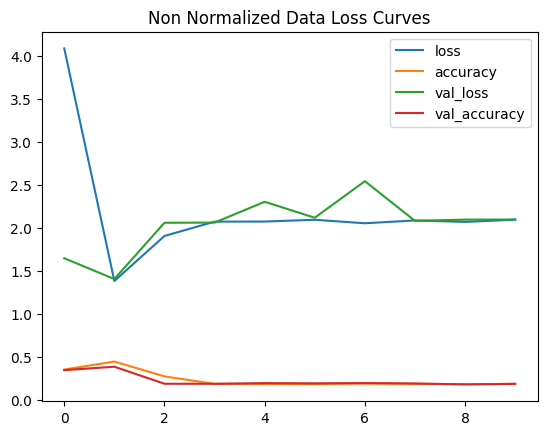

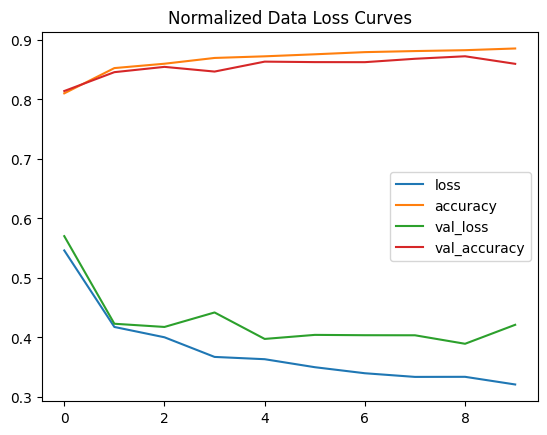

In [54]:
pd.DataFrame(history_1.history).plot(title='Non Normalized Data Loss Curves')
pd.DataFrame(history_2.history).plot(title='Normalized Data Loss Curves')

In [12]:
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(1000, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(10, activation='softmax'))
model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))
history_3=model_3.fit(train_data_norm,train_labels,epochs=30,validation_data=(test_data_norm,test_labels), callbacks=[lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 52s 26ms/step - loss: 0.4722 - accuracy: 0.8302 - val_loss: 0.4529 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3617 - accuracy: 0.8660 - val_loss: 0.3945 - val_accuracy: 0.8587 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 76s 40ms/step - loss: 0.3327 - accuracy: 0.8766 - val_loss: 0.3619 - val_accuracy: 0.8661 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3121 - accuracy: 0.8837 - val_loss: 0.4000 - val_accuracy: 0.8586 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3021 - accuracy: 0.8874 - val_loss: 0.3472 - val_accuracy: 0.8806 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2888 - accuracy: 0.8922 - val_loss: 0.3848 - val_accuracy: 0.8678 - lr: 0.0018
Epoch 7/30
1875/1875 [========================

Text(0, 0.5, 'Loss')

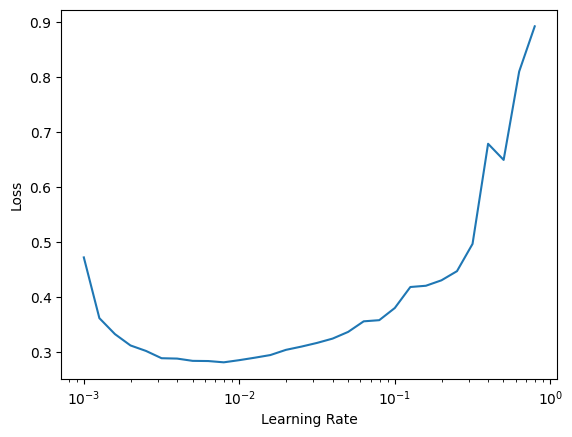

In [14]:
lrs=1e-3*(10**(np.arange(30)/10))
plt.semilogx(lrs,history_3.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

In [18]:
model_4=tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(1000,activation='relu'))
model_4.add(tf.keras.layers.Dense(100,activation='relu'))
model_4.add(tf.keras.layers.Dense(10, activation='softmax'))
model_4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))
history_4=model_4.fit(train_data_norm,train_labels,epochs=15,validation_data=(test_data_norm,test_labels))

Epoch 1/15
1875/1875 [==============================] - 60s 31ms/step - loss: 0.4743 - accuracy: 0.8280 - val_loss: 0.4275 - val_accuracy: 0.8425
Epoch 2/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3606 - accuracy: 0.8683 - val_loss: 0.3722 - val_accuracy: 0.8633
Epoch 3/15
1875/1875 [==============================] - 59s 31ms/step - loss: 0.3222 - accuracy: 0.8808 - val_loss: 0.3476 - val_accuracy: 0.8752
Epoch 4/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2988 - accuracy: 0.8889 - val_loss: 0.3482 - val_accuracy: 0.8714
Epoch 5/15
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2819 - accuracy: 0.8949 - val_loss: 0.3642 - val_accuracy: 0.8673
Epoch 6/15
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2643 - accuracy: 0.9007 - val_loss: 0.3607 - val_accuracy: 0.8762
Epoch 7/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2513 - accuracy: 0.9043 - val_loss: 0.3523 -

In [20]:
y_pred_4=model_4.predict(test_data_norm)

313/313 [==============================] - 4s 11ms/step


In [21]:
y_pred_4=y_pred_4.argmax(axis=1)

In [24]:
confusion_matrix(test_labels,y_pred_4)


array([[842,   1,  16,  18,   3,   0, 113,   0,   7,   0],
       [  5, 973,   1,  10,   7,   0,   3,   0,   1,   0],
       [ 14,   0, 865,   9,  77,   0,  35,   0,   0,   0],
       [ 28,  11,  12, 899,  25,   0,  23,   0,   2,   0],
       [  0,   0, 128,  41, 805,   0,  25,   0,   1,   0],
       [  0,   0,   0,   1,   0, 958,   0,  17,   0,  24],
       [ 98,   2, 119,  26, 105,   0, 646,   0,   4,   0],
       [  0,   0,   0,   0,   0,  11,   0, 972,   0,  17],
       [  4,   1,   3,   5,   4,   2,   8,   4, 969,   0],
       [  0,   0,   0,   0,   0,   6,   1,  37,   0, 956]], dtype=int64)

In [40]:
test_data_norm.shape

(10000, 784)

In [71]:
def plot_random_img(model,images,true_labels,classes):
    """Picks a random image, plots it and labels it with a prediction label and the truth label"""
    i=random.randint(0,len(images))
    target_image=images[i]
    dims=target_image.shape
    target_image_mod=target_image.reshape(1,dims[0])
    pred_probs=model.predict(target_image_mod)
    pred_label=classes[pred_probs.argmax()]
    true_label=classes[true_labels[i]]
    plt.imshow(target_image.reshape(tf.cast(np.sqrt(dims[0]),tf.int32),tf.cast(np.sqrt(dims[0]),tf.int32)),cmap=plt.cm.binary)
    if pred_label==true_label:
        color='green'
    else:
        color='red'
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)

28.0
1/1 [==============================] - 0s 85ms/step


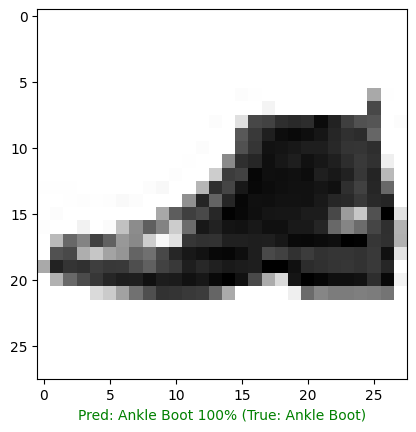

In [72]:
plot_random_img(model_4,test_data_norm,test_labels,label_names)

In [73]:
weights,biases=model_4.layers[1].get_weights()

weights,weights.shape

(array([[ 0.16027212,  0.01911863, -0.04366529, ..., -0.05041549,
          0.20120534,  0.04230596],
        [ 0.01741501,  0.26289508, -0.15404916, ..., -0.17102991,
         -0.19951415,  0.16824038],
        [ 0.05693416, -0.03060023, -0.06081309, ..., -0.02527405,
          0.01154985,  0.088677  ],
        ...,
        [-0.03065476, -0.08085511,  0.01884595, ..., -0.0600152 ,
          0.01469602, -0.07016841],
        [-0.09696826,  0.07133412,  0.01381209, ..., -0.06667149,
          0.01760724,  0.01933402],
        [ 0.18897207,  0.33063173, -0.06623956, ...,  0.08170895,
         -0.12303899,  0.13977318]], dtype=float32),
 (1000, 100))